# UTSA CS 3793/5233: Assignment-4

Fall 2021


**Mahmud - Hasanul - (cpr793)**






## Learning Objectives

*   Deep Learning
*   Computer Vision - Convolutional Neural Network
*   Natrual Language Processing - Recurrent Neural Network


## General Information

The base structure and comments are provided on what should be done. You are free to use any code from online sources, but please cite the source properly. Also, you are supposed to create/train the DL model and not use pre-trained models.

**TIPS** while working on this assignment:


*   You will have to keep on updating the model to improve accuracy. Hence, all except the first step (loading the data) would be repeated multiple times. i.e. repeat -- model creation, training & testing.
*   Training a Deep Learning model on real-world datasets and obtain decent accuracy is time consuming. For this assignment, it may take at least 40-60 min, if not more, to train the complete data and get around 35% testing accuracy. Hence, have enough time planned out for finishing the assignment.
*   Because of the large training time, it is impossisble to train each student's model. Hence, you will be required to **save the weights** in a file. These weights can then be loaded for testing purposes. More information is provided in a TensorFlow tutorial [here](https://www.tensorflow.org/tutorials/keras/save_and_load).
*   Please refer to the [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) for selecting the *'activation function', 'loss', 'optimizer' & 'metrics'*. At least use 'accuracy' as one of the 'metrics'.




##Import Libraries

Write all the import statements here.

In [31]:
# import all required libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.losses import sparse_categorical_crossentropy
from google.colab import drive
drive.mount('/content/drive')
loss_function = sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
no_classes = 100
no_epochs = 100
optimizer = Adam()
validation_split = 0.2
verbosity = 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#file_train = '/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/training.csv'
#file_test = '/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/test.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Computer Vision - CNN

The goal of this task is to get hands-on experience in developing, training and testing **Convolutional Neural Network** for the Computer Vision task of Object/Image Classification.

## Load/Prepare Data

(20 points)

In this assignment, will work with the well-known **CIFAR-100 dataset**. The dataset consists of 60000 32x32 color images, which belong to 100 classes, with 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). The 100 classes in the dataset are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html). Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

In this section, you will write code for the following: 

*   Load the CIFAR-100 dataset
*   Prepare the data to be used for the DL model creation and training
*   Visualize the data by plotting 100 random images, one each for the 100 classes



In [32]:
# Load the data - training as well as testing


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Prepare the data that can be used by the next step - creating and training the DL model

# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
print(len(fine_labels))


169017344/169001437 [==============================] - 5s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
100


[55]


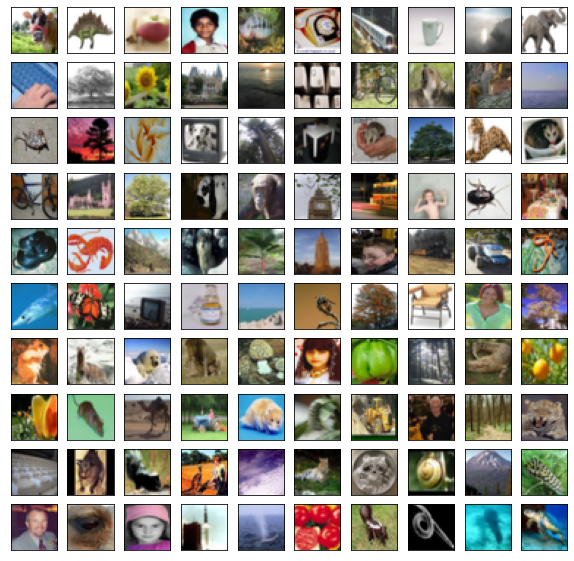

In [33]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total
print(y_train[100])
x = y_train[100]
#print(int(x))
#print(fine_labels[int(x)])
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(32,32,3), cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i]])
plt.show()


In [34]:
#Normalizing the datasets
print(x_train.min(), x_train.max())

x_train = x_train / 255.0

x_test = x_test / 255.0
print(x_train.shape)

0 255
(50000, 32, 32, 3)


In [35]:
##flattening the datasets
#x_train = x_train.reshape(-1, 32*32*3)
#x_test = x_test.reshape(-1, 32*32*3)

print(x_train.shape,x_test.shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

(50000, 32, 32, 3) (10000, 32, 32, 3)


## CNN Model Creation

(20 points)

In this section, you will write code for the following:

*   Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
*   Print the DL model summary

In [36]:
# Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
'''
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, 
                          activation='relu', 
                          input_shape=(3072,)),
    tf.keras.layers.Dense(100, activation='softmax')
])
'''
batch_size = 50
input_shape = (32, 32, 3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])



#model.summary()

In [37]:
# Print the DL model summary
model.summary()
#print(np.unique(x_train['fine_labels']))


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)      

## Training

(20 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training CIFAR-100 data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/", to be used for the testing phase


In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/"
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])


In [38]:
# Train/fit the DL model using the training CIFAR-100 data
history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=20,
            verbose=verbosity,
            validation_split=validation_split)


Epoch 1/20
800/800 [==============================] - 10s 5ms/step - loss: 4.0791 - accuracy: 0.0671 - val_loss: 3.7663 - val_accuracy: 0.1058
Epoch 2/20
800/800 [==============================] - 3s 4ms/step - loss: 3.4278 - accuracy: 0.1738 - val_loss: 3.2757 - val_accuracy: 0.1990
Epoch 3/20
800/800 [==============================] - 4s 5ms/step - loss: 3.0419 - accuracy: 0.2464 - val_loss: 2.9813 - val_accuracy: 0.2580
Epoch 4/20
800/800 [==============================] - 3s 4ms/step - loss: 2.7993 - accuracy: 0.2929 - val_loss: 2.8214 - val_accuracy: 0.2906
Epoch 5/20
800/800 [==============================] - 3s 4ms/step - loss: 2.5964 - accuracy: 0.3353 - val_loss: 2.7372 - val_accuracy: 0.3098
Epoch 6/20
800/800 [==============================] - 3s 4ms/step - loss: 2.4302 - accuracy: 0.3689 - val_loss: 2.6878 - val_accuracy: 0.3249
Epoch 7/20
800/800 [==============================] - 4s 5ms/step - loss: 2.2802 - accuracy: 0.4029 - val_loss: 2.5938 - val_accuracy: 0.3440
Epoch

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/cifar/cpr793_cifar1_model.model/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/cifar/cpr793_cifar1_model.model/assets


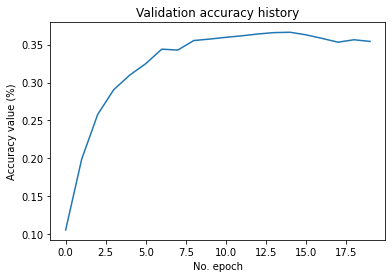

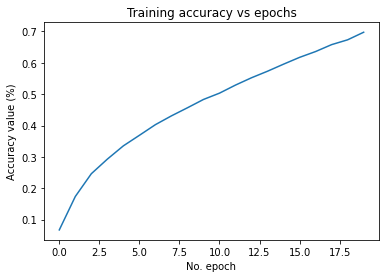

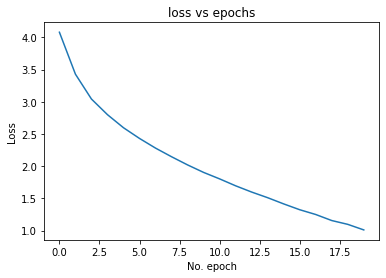

In [39]:
# Plot the training/validation accuracy and loss
model.save('/content/drive/My Drive/Colab Notebooks/cifar/cpr793_cifar1_model.model')
# Visualize history
# Plot history: Loss
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['accuracy'])
plt.title('Training accuracy vs epochs')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('loss vs epochs')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.show()




## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/cifar/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the CIFAR-100 test dataset. Accuracy value should be printed. Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

This section of the code should be able to run independently from the **training** section, i.e. run this section directly after creating the model. 

In [40]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"
model.load_weights('/content/drive/My Drive/Colab Notebooks/cifar/cpr793_cifar1_model.model')


In [41]:
# Evaluate the trained DL model on the CIFAR-100 test dataset
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


Test loss: 3.2954769134521484 / Test accuracy: 0.36000001430511475


## Model Performance - Accuracy (Extra Credit)

(10 points)

For the models submitted, we will look at the accuracy values on the test data. Credit will be allocated based on how the performance is for your model. The submission with the highest accuracy value will get the highest credit and the one with the lowest accuracy value will get the lowest credit.

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
##here we can see our accuracy is around 32%.

Test loss: 11.33987808227539 / Test accuracy: 0.31299999356269836


# Natural Language Processing - LSTM

The goal of this task is to get hands-on experience in developing, training and testing **LSTM** for the Natural Language Processing task of Sentiment Analysis / Text Classification. In this part, you will work with the well-known **Reuters newswire classification dataset**. The dataset consists of newswires from Reuters, labeled over 46 topics. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) or [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires (8982 training and 2246 testing). The goal is to classify a newswire into one of the 46 output catergories.


## Load/Prepare Data

(20 points)

In this section, you will write code for the following: 

*   Load the Reuters dataset - use the Keras version
 *   Select the vocabulary size while loading the data
 *   The data will be loaded as integer representations for each word
*   Prepare the data to be used for the next steps
 *   Each data entry (newswire) can be of different lengths
 *   Make each newswire consistent - same number of words
 *   'Pad' words (say 0) to get to the standard length or remove words

In [23]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word
import keras
import numpy as np
import tensorflow as tf
from keras.datasets import reuters
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")

print('# of Training Samples: {}'.format(len(x_train)))
print('# of Test Samples: {}'.format(len(x_test)))

num_classes = max(y_train) + 1
print('# of Classes: {}'.format(num_classes))



# of Training Samples: 8982
# of Test Samples: 2246
# of Classes: 46


In [24]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words

from keras.preprocessing.text import Tokenizer

max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(x_train[0])
print(len(x_train[0]))
print(max(x_train[0]))

print(y_train[0])
print(len(y_train[0]))




[0. 1. 0. ... 0. 0. 0.]
10000
1.0
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
46


### LSTM Model Creation

(20 points)

In this section, you will write code for the following:

*   Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
*   Print the DL model summary

In [25]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,LSTM,SimpleRNN,Reshape

model = Sequential()
#model.add(SimpleRNN(22,input_shape=(max_words,)))
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Reshape((1,512)))
model.add(LSTM(512))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [17]:
# Print the DL model summary
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               5120512   
                                                                 
 activation_8 (Activation)   (None, 512)               0         
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 reshape_1 (Reshape)         (None, 1, 512)            0         
                                                                 
 lstm_3 (LSTM)               (None, 512)               2099200   
                                                                 
 dense_9 (Dense)             (None, 46)                23598     
                                                                 
 activation_9 (Activation)   (None, 46)              

## Training

(20 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training Reuters data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load)), to be used for the testing phase


In [26]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/"
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.metrics_names)


[]


In [27]:
# Train/fit the DL model using the training Reuters data
batch_size = 32
epochs = 20

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)



Epoch 1/20
253/253 [==============================] - 3s 7ms/step - loss: 1.3690 - accuracy: 0.6835 - val_loss: 1.0296 - val_accuracy: 0.7709
Epoch 2/20
253/253 [==============================] - 1s 5ms/step - loss: 0.6351 - accuracy: 0.8484 - val_loss: 0.8892 - val_accuracy: 0.7909
Epoch 3/20
253/253 [==============================] - 1s 5ms/step - loss: 0.3477 - accuracy: 0.9146 - val_loss: 0.9474 - val_accuracy: 0.8020
Epoch 4/20
253/253 [==============================] - 1s 5ms/step - loss: 0.2344 - accuracy: 0.9396 - val_loss: 0.9650 - val_accuracy: 0.8009
Epoch 5/20
253/253 [==============================] - 1s 5ms/step - loss: 0.1855 - accuracy: 0.9509 - val_loss: 1.0042 - val_accuracy: 0.7976
Epoch 6/20
253/253 [==============================] - 1s 5ms/step - loss: 0.1558 - accuracy: 0.9531 - val_loss: 1.0523 - val_accuracy: 0.7953
Epoch 7/20
253/253 [==============================] - 1s 5ms/step - loss: 0.1387 - accuracy: 0.9568 - val_loss: 1.1246 - val_accuracy: 0.7942
Epoch 

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/reuters/cpr793_reuters_model.model/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/reuters/cpr793_reuters_model.model/assets


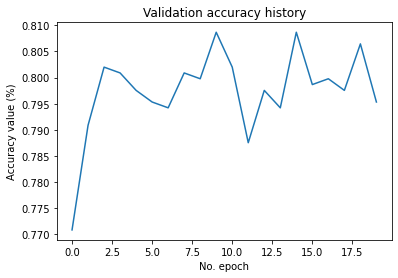

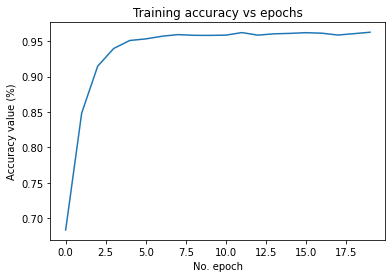

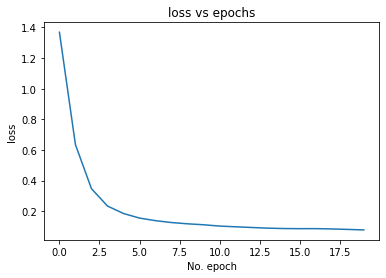

In [28]:
# Plot the training/validation accuracy and loss
model.save('/content/drive/My Drive/Colab Notebooks/reuters/cpr793_reuters_model.model')
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['accuracy'])
plt.title('Training accuracy vs epochs')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('No. epoch')
plt.show()

## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the Reuters test dataset. Accuracy value should be printed.

This section of the code should be able to run independently from the **training** section, i.e., run this section directly after creating the model.

In [29]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"
model.load_weights('/content/drive/My Drive/Colab Notebooks/reuters/cpr793_reuters_model.model')
#trying = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/reuters/cpr793_reuters_model.model')

In [30]:
# Evaluate the trained DL model on the Reuters test dataset
batch_size = 32
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## here we can see our accuracy is around 80%

71/71 [==============================] - 0s 3ms/step - loss: 1.5462 - accuracy: 0.7894
Test loss: 1.5461950302124023
Test accuracy: 0.7894033789634705


# Submission Instructions



1.   Complete all tasks above.
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Download and zip the folders "/content/drive/My Drive/Colab Notebooks/cifar/" (abc123_cifar_model.zip) and "/content/drive/My Drive/Colab Notebooks/reuters/" (abc123_reuters_model.zip) 
4.   Upload the .ipynb file and .zip on Blackboard



## Rubric

*   Computer Vision - CNN
    *   (20 points) Load/Prepare Data
    *   (20 points) CNN Model Creation
    *   (20 points) Training
    *   (15 points) Testing/Evaluation
    *   (10 points) EXTRA CREDIT - Model Performance - Accuracy
*   Natural Language Processing - RNN
    *   (20 points) Load/Prepare Data
    *   (20 points) RNN Model Creation
    *   (20 points) Training
    *   (15 points) Testing/Evaluation 

